In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
import sklearn as sk

In [3]:
mpl.rc('font', family='Nanumgothic')
mpl.rc('axes', unicode_minus=False)

## XOR문제

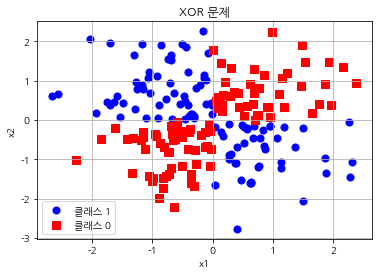

In [6]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0]> 0, X_xor[:, 1]> 0)  # 배타적 논리합
y_xor = np.where(y_xor, 1, 0)  # 조건만족하는 위치의 인덱스 가져오기

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
           c='b', marker = 'o', label = '클래스 1', s=50)
plt.scatter(X_xor[y_xor == 0,0], X_xor[y_xor == 0,1],
           c='r', marker='s', label='클래스 0', s=50)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR 문제')
plt.grid(True)
plt.show()

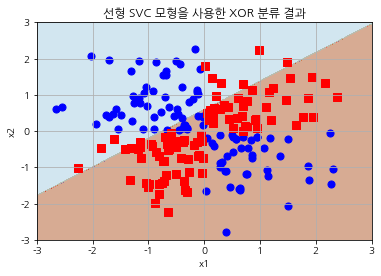

In [7]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='클래스 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='클래스 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "선형 SVC 모형을 사용한 XOR 분류 결과")
plt.grid(True)
plt.show()

## 기저함수를 사용한 비선형 판별 모형

In [8]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [9]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ]])

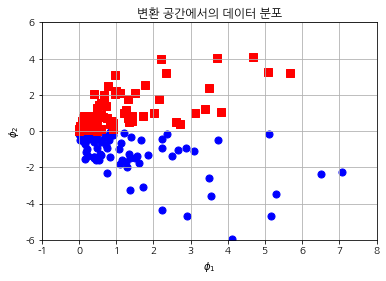

In [10]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
y_xor = np.logical_xor(X_xor2[:, 0]> 0, X_xor2[:, 1]> 0)  # 배타적 논리합
y_xor = np.where(y_xor, 1, 0)  # 조건만족하는 위치의 인덱스 가져오기
plt.scatter(X_xor2[y_xor == 1, 0], X_xor2[y_xor == 1, 1], c="b", marker='o', s=50)
plt.scatter(X_xor2[y_xor == 0, 0], X_xor2[y_xor == 0, 1], c="r", marker='s', s=50)
plt.ylim(-6, 6)
plt.xlim(-1, 8)
plt.title("변환 공간에서의 데이터 분포")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.grid(True)
plt.show()

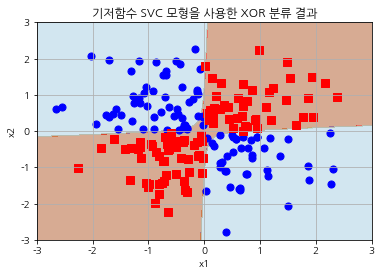

In [11]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([("basis", FunctionTransformer(basis)),
                      ('svc', SVC(kernel='linear'))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, '기저함수 SVC 모형을 사용한 XOR 분류 결과')
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.grid(True)
plt.show()

## 다항 커널

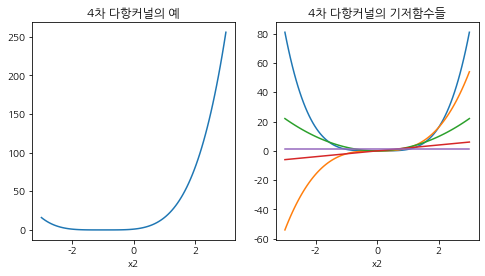

In [4]:
x1 = 1
x2 = np.linspace(-3, 3, 100)

def poly4(x1, x2):
    return (x1* x2 + 1)**4

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(x2, poly4(x1, x2), ls="-")
plt.xlabel("x2")
plt.title("4차 다항커널의 예")

plt.subplot(122)
plt.plot(x2, x2 ** 4)
plt.plot(x2, 2 * x2 ** 3)
plt.plot(x2, np.sqrt(6) * x2 ** 2)
plt.plot(x2, 2 * x2)
plt.plot(x2, np.ones_like(x2))
plt.xlabel("x2")
plt.title("4차 다항커널의 기저함수들")

plt.show()

## RBF 커널

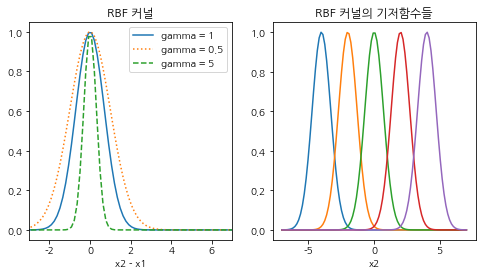

In [5]:
x1 = 0.0
x2 = np.linspace(-7, 7, 100)

def rbf(x1, x2, gamma):
    return np.exp(-gamma * np.abs(x2 - x1) ** 2)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(x2, rbf(x1, x2, 1), ls="-", label="gamma = 1")
plt.plot(x2, rbf(x1, x2, 0.5), ls=":", label="gamma = 0.5")
plt.plot(x2, rbf(x1, x2, 5), ls="--", label="gamma = 5")
plt.xlabel("x2 - x1")
plt.xlim(-3, 7)
plt.legend(loc=1)
plt.title("RBF 커널")

plt.subplot(122)
plt.plot(x2, rbf(-4, x2, 1))
plt.plot(x2, rbf(-2, x2, 1))
plt.plot(x2, rbf(0, x2, 1))
plt.plot(x2, rbf(2, x2, 1))
plt.plot(x2, rbf(4, x2, 1))
plt.xlabel("x2")
plt.title("RBF 커널의 기저함수들")

plt.show()

## scikit-learn의 커널 SVM

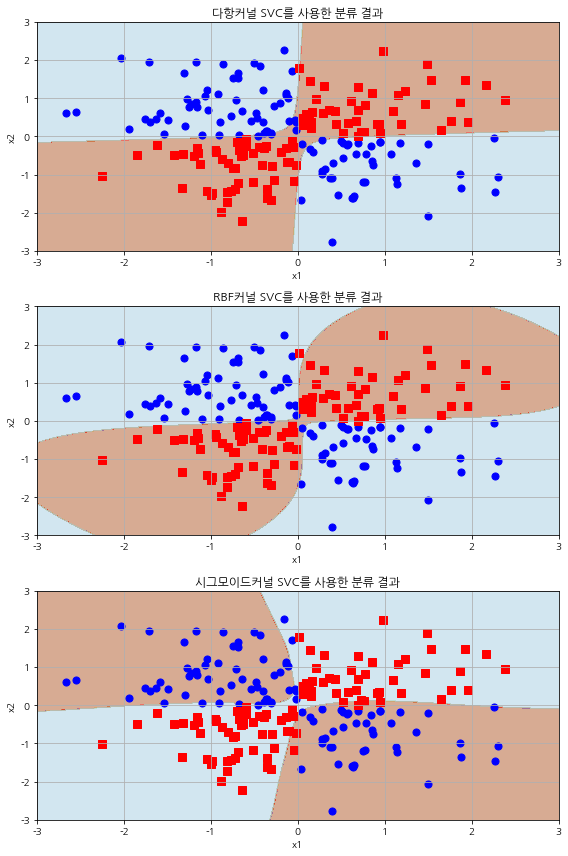

In [16]:
polysvc = SVC(kernel='poly', degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
rbfsvc = SVC(kernel = 'rbf').fit(X_xor, y_xor)
sigmoidsvc = SVC(kernel='sigmoid', gamma=2, coef0=2).fit(X_xor, y_xor)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plt.grid(True)
plot_xor(X_xor, y_xor, polysvc, "다항커널 SVC를 사용한 분류 결과")
plt.subplot(312)
plt.grid(True)
plot_xor(X_xor, y_xor, rbfsvc, 'RBF커널 SVC를 사용한 분류 결과')
plt.subplot(313)
plot_xor(X_xor, y_xor, sigmoidsvc, '시그모이드커널 SVC를 사용한 분류 결과')
plt.tight_layout()
plt.grid(True)
plt.show()


## 커널 파라미터의 영향

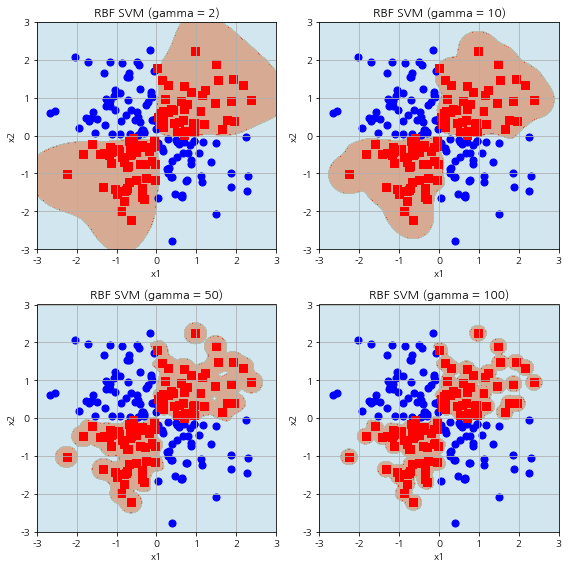

In [17]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.grid(True)
plot_xor(X_xor, y_xor, SVC(kernel='rbf', gamma=2).fit(X_xor, y_xor), 'RBF SVM (gamma = 2)')
plt.subplot(222)
plt.grid(True)
plot_xor(X_xor, y_xor, SVC(kernel='rbf', gamma=10).fit(X_xor, y_xor), 'RBF SVM (gamma = 10)')
plt.subplot(223)
plt.grid(True)
plot_xor(X_xor, y_xor, SVC(kernel='rbf', gamma=50).fit(X_xor, y_xor), 'RBF SVM (gamma = 50)')
plt.subplot(224)
plt.grid(True)
plot_xor(X_xor, y_xor, SVC(kernel='rbf', gamma=100).fit(X_xor, y_xor), 'RBF SVM (gamma = 100)')
plt.tight_layout()
plt.show()

## 붓꽃 문제에 응용하기

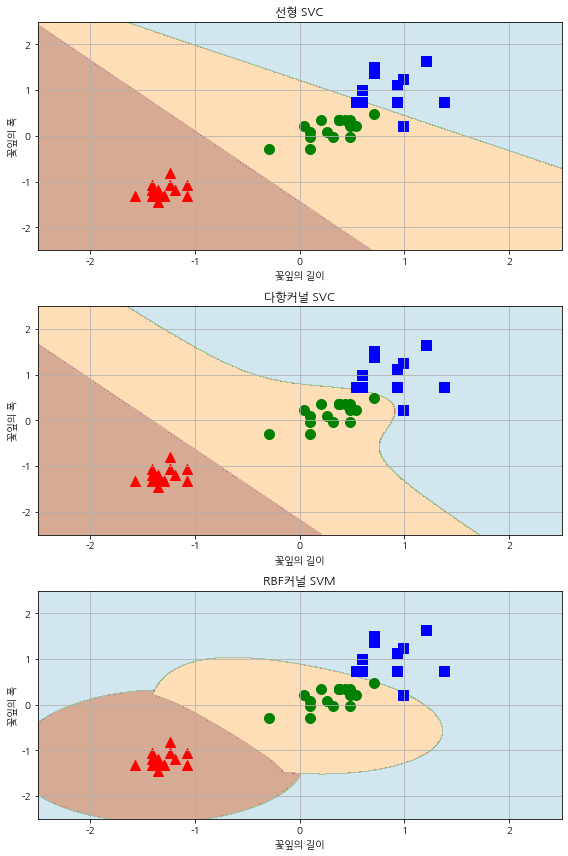

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # train set과 test set 분리
from sklearn.preprocessing import StandardScaler # 평균 0, 분산 1을 갖도록 스케일 조정

iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_train))

def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(xmin, xmax, (xmax-xmin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("꽃잎의 길이")
    plt.ylabel("꽃잎의 폭")
    plt.title(title)

model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0, gamma=10, C=1.0).fit(X_test_std, y_test)
model3 = SVC(kernel='rbf', random_state=0, gamma=1,C=1.0).fit(X_test_std, y_test)
            
    
plt.figure(figsize=(8, 12))
plt.subplot(311)
plt.grid(True)
plot_iris(X_test_std, y_test, model1, "선형 SVC")

plt.subplot(312)
plt.grid(True)
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")

plt.subplot(313)
plt.grid(True)
plot_iris(X_test_std, y_test, model3, "RBF커널 SVM")
plt.tight_layout()
plt.show()   